In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce

In [75]:
from os import system, listdir
from os.path import join, isfile

csvs = [f for f in listdir('./dataout') if isfile(join('./dataout', f))]
csvs

['micro_aevol_cpu_dynamic_4.csv',
 'micro_aevol_cpu_dynamic_16.csv',
 'micro_aevol_cpu_static.csv',
 'micro_aevol_cpu_dynamic_8.csv',
 'micro_aevol_cpu_dynamic_32.csv',
 'micro_aevol_cpu_dynamic_128.csv',
 'micro_aevol_cpu_dynamic_64.csv',
 'micro_aevol_cpu_dynamic_2.csv',
 'micro_aevol_cpu_dynamic_3.csv',
 'micro_aevol_cpu_dynamic_1.csv',
 'micro_aevol_cpu_guided.csv']

In [76]:
frames = [pd.read_csv(join('./dataout',f)) for f in csv]
frames

[   0  duration_dyn_4  nbThreads  nbIndis
 0  1      2444694448          1     1250
 1  2      3969287511          2     2500
 2  3      4738802345          3     3750
 3  4      5830863157          4     5000
 4  5      7087431413          5     6250
 5  6      5893361792          6     7500
 6  7     10674691249          7     8750
 7  8     10014832443          8    10000,
    0  duration_dyn_16  nbThreads  nbIndis
 0  1       2944074203          1     1250
 1  2       4279615755          2     2500
 2  3       4841407104          3     3750
 3  4       6027624136          4     5000
 4  5       7280479928          5     6250
 5  6       6593836820          6     7500
 6  7      11844837055          7     8750
 7  8      11453924849          8    10000,
    0  duration_static  nbThreads  nbIndis
 0  1       2787763317          1     1250
 1  2       4369122120          2     2500
 2  3       4914868277          3     3750
 3  4       6096033340          4     5000
 4  5       817235

In [ ]:
dyn_1.drop(columns='duration_one_thread', inplace=True)
dyn_2.drop(columns='duration_one_thread', inplace=True)
dyn_3.drop(columns='duration_one_thread', inplace=True)
dyn_4.drop(columns='duration_one_thread', inplace=True)
dyn_8.drop(columns='duration_one_thread', inplace=True)
dyn_16.drop(columns='duration_one_thread', inplace=True)
dyn_32.drop(columns='duration_one_thread', inplace=True)
dyn_64.drop(columns='duration_one_thread', inplace=True)
dyn_128.drop(columns='duration_one_thread', inplace=True)
guided.drop(columns='duration_one_thread', inplace=True)
static.drop(columns='duration_one_thread', inplace=True)


In [47]:
dyn_1.rename(columns={'duration': 'duration_dyn_1'}, inplace=True)
dyn_2.rename(columns={'duration': 'duration_dyn_2'}, inplace=True)
dyn_3.rename(columns={'duration': 'duration_dyn_3'}, inplace=True)
dyn_4.rename(columns={'duration': 'duration_dyn_4'}, inplace=True)
dyn_8.rename(columns={'duration': 'duration_dyn_8'}, inplace=True)
dyn_16.rename(columns={'duration': 'duration_dyn_16'}, inplace=True)
dyn_32.rename(columns={'duration': 'duration_dyn_32'}, inplace=True)
dyn_64.rename(columns={'duration': 'duration_dyn_64'}, inplace=True)
dyn_128.rename(columns={'duration': 'duration_dyn_128'}, inplace=True)
guided.rename(columns={'duration': 'duration_guided'}, inplace=True)
static.rename(columns={'duration': 'duration_static'}, inplace=True)


In [48]:
data_frames = [dyn_1, dyn_2, dyn_3, dyn_4, dyn_8, dyn_16, dyn_32, dyn_64, dyn_128, guided, static]


In [77]:
data_merged = reduce(lambda left, right: pd.merge(left, right, on=['nbThreads', 'nbIndis', '0']), frames)
data_merged.drop(columns='0', inplace=True)

<AxesSubplot:xlabel='nbIndis'>

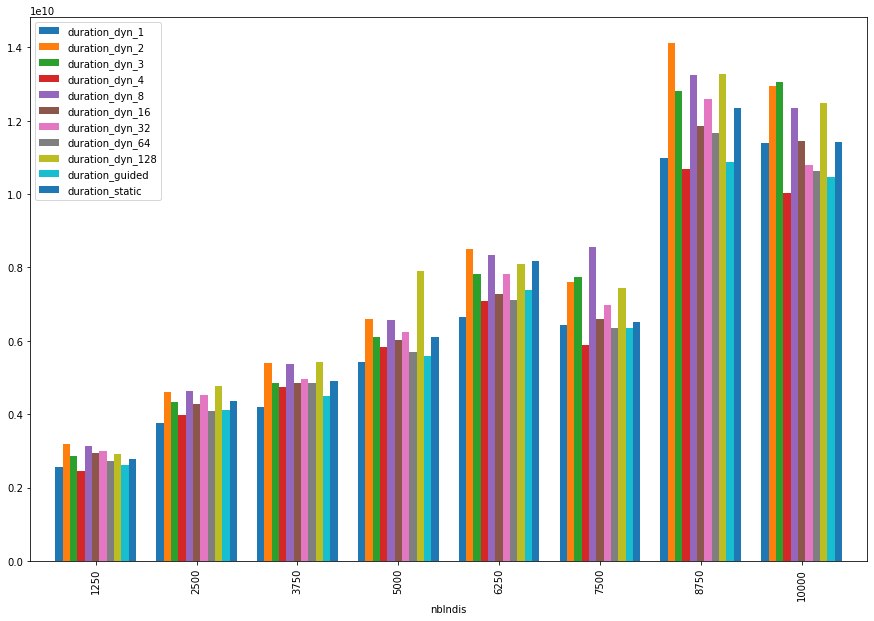

In [78]:
data_merged.plot(x='nbIndis', y=['duration_dyn_1', 'duration_dyn_2', 'duration_dyn_3', 'duration_dyn_4', 'duration_dyn_8', 'duration_dyn_16', 'duration_dyn_32', 'duration_dyn_64', 'duration_dyn_128', 'duration_guided', 'duration_static'], kind='bar', width=0.8, figsize=(15, 10))